In [1]:
# This is a program to test out netcdf dataset from era5 reanalysis with xarray
%matplotlib inline
import yaml
yaml.warnings({'YAMLLoadWarning': False})
# the default loader is deprecated, I dont know how to change the default loader
import xarray as xr
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import holoviews as hv

In [2]:
# Reading the file 
filename = r"C:\Users\krish\Desktop\Courses\Thesis\AA-Double Jets\data\1980_1.nc"
dataset = xr.open_dataset(filename, chunks = {'time':10})

In [3]:
# Describing the nature or structure of the file

print(dataset,'\n')

print("Printing each of the key properties of the dataset \n")
print(dataset.dims)
print(dataset.coords)
print(dataset.data_vars)
print(dataset.attrs,'\n')
print(dataset.variables)

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 27, longitude: 1440, time: 2208)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 1980-06-01 ... 1980-08-31T23:00:00
Data variables:
    u          (time, level, latitude, longitude) float32 dask.array<shape=(2208, 27, 721, 1440), chunksize=(10, 27, 721, 1440)>
Attributes:
    Conventions:  CF-1.6
    history:      2019-03-10 09:31:07 GMT by grib_to_netcdf-2.10.0: /opt/ecmw... 

Printing each of the key properties of the dataset 

Frozen(SortedKeysDict({'longitude': 1440, 'latitude': 721, 'level': 27, 'time': 2208}))
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (le

In [4]:
# Now lets access the variables within the dataset
u = dataset['u']
print(u)

<xarray.DataArray 'u' (time: 2208, level: 27, latitude: 721, longitude: 1440)>
dask.array<shape=(2208, 27, 721, 1440), dtype=float32, chunksize=(10, 27, 721, 1440)>
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 1980-06-01 ... 1980-08-31T23:00:00
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind


In [5]:
# its nice to have the help window open for now
help(u)

Help on DataArray in module xarray.core.dataarray object:

class DataArray(xarray.core.common.AbstractArray, xarray.core.common.DataWithCoords)
 |  DataArray(data, coords=None, dims=None, name=None, attrs=None, encoding=None, indexes=None, fastpath=False)
 |  
 |  N-dimensional array with labeled coordinates and dimensions.
 |  
 |  DataArray provides a wrapper around numpy ndarrays that uses labeled
 |  dimensions and coordinates to support metadata aware operations. The API is
 |  similar to that for the pandas Series or DataFrame, but DataArray objects
 |  can have any number of dimensions, and their contents have fixed data
 |  types.
 |  
 |  Additional features over raw numpy arrays:
 |  
 |  - Apply operations over dimensions by name: ``x.sum('time')``.
 |  - Select or assign values by integer location (like numpy): ``x[:10]``
 |    or by label (like pandas): ``x.loc['2014-01-01']`` or
 |    ``x.sel(time='2014-01-01')``.
 |  - Mathematical operations (e.g., ``x - y``) vectorize 

In [8]:
# Now let's prepare data relevant for our research
# 1st step would be deciding the temporal resolution, here I am taking it as 5 days
u_north = u.sel(latitude = slice(90,0))
print(u_north)
u_zonal = u_north.mean(dim='longitude')
print(u_zonal)
u_zonal_daily = u_zonal.resample(time='D').mean(dim='time')
u_zonal_monthly = u_zonal.resample(time='M').mean(dim='time')
dataset_pp = dataset.sel(latitude = slice(90,0)).mean(dim='longitude').resample(time='D').mean(dim='time')
print(u_zonal_daily)
print(u_zonal_monthly)
print(dataset_pp)

<xarray.DataArray 'u' (time: 2208, level: 27, latitude: 361, longitude: 1440)>
dask.array<shape=(2208, 27, 361, 1440), dtype=float32, chunksize=(10, 27, 361, 1440)>
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
  * level      (level) int32 100 125 150 175 200 225 ... 900 925 950 975 1000
  * time       (time) datetime64[ns] 1980-06-01 ... 1980-08-31T23:00:00
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind
<xarray.DataArray 'u' (time: 2208, level: 27, latitude: 361)>
dask.array<shape=(2208, 27, 361), dtype=float32, chunksize=(10, 27, 361)>
Coordinates:
  * latitude  (latitude) float32 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
  * level     (level) int32 100 125 150 175 200 225 ... 875 900 925 950 975 1000
  * time      (time) datetime64[ns] 1980-06-01 ... 1980-08-31T23:00:00
<xarray.DataArray 'u' (ti

In [9]:
# Finally the data we are gonna work with is u_zonal_daily.
print(u_zonal_daily)
print(u_zonal_daily[:,:,:])

<xarray.DataArray 'u' (time: 92, level: 27, latitude: 361)>
dask.array<shape=(92, 27, 361), dtype=float32, chunksize=(1, 27, 361)>
Coordinates:
  * time      (time) datetime64[ns] 1980-06-01 1980-06-02 ... 1980-08-31
  * latitude  (latitude) float32 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
  * level     (level) int32 100 125 150 175 200 225 ... 875 900 925 950 975 1000
<xarray.DataArray 'u' (time: 92, level: 27, latitude: 361)>
dask.array<shape=(92, 27, 361), dtype=float32, chunksize=(1, 27, 361)>
Coordinates:
  * time      (time) datetime64[ns] 1980-06-01 1980-06-02 ... 1980-08-31
  * latitude  (latitude) float32 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
  * level     (level) int32 100 125 150 175 200 225 ... 875 900 925 950 975 1000


AttributeError: 'QuadMesh' object has no attribute 'save'

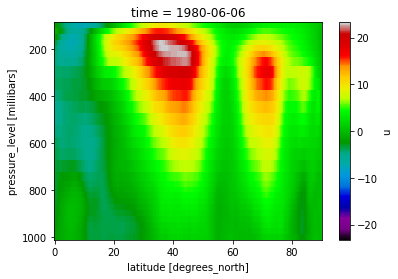

In [12]:
# Data visualization of a random day. 
fig = u_zonal_daily.isel(time=5).plot(cmap = 'nipy_spectral', yincrease = False)
fig.save('day0.png')

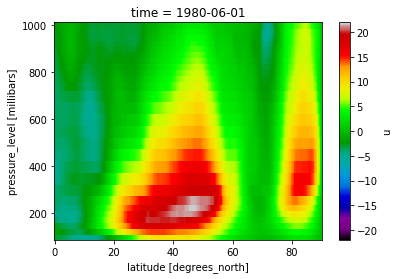

In [9]:
fig = plt.figure()
def animate(frame):
    return u_zonal_daily.isel(time=frame).plot(cmap = 'nipy_spectral')
ani = animation.FuncAnimation(fig, animate, frames = u_zonal_daily.time.size)
#ani.save(r'zonalwind_1980.mp4', writer=animation.FFMpegWriter(fps=8))
#ani.save()
#plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

TypeError: Cannot cast ufunc greater input from dtype('<m8[ns]') to dtype('<m8') with casting rule 'same_kind'

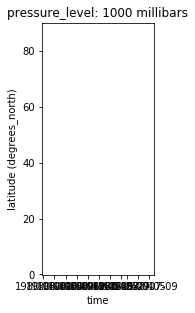

In [10]:
# Another attempt at animating
hv.extension('matplotlib')
ds = hv.Dataset(u_zonal_daily.isel(time=range(40)))
images = ds.to(hv.Image).options(fig_inches=(10, 5), colorbar=True, cmap='nipy_spectral')
hv.save(images, 'test1.mp4', fps=4)